In [69]:
import pandas as pd
from sklearn.metrics import (
    roc_auc_score, 
    average_precision_score,
)
from pycaret.classification import *
import seaborn as sns
import numpy as np

In [51]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "DejaVu Sans"   # always available after fonts-dejavu-core
mpl.rcParams["font.sans-serif"] = ["DejaVu Sans"]

In [2]:
EPFinder_model = load_model('finalize_EPFinder_model')

Transformation Pipeline and Model Successfully Loaded


# eBMD SNPs in openchromatin

In [27]:
eBMD_vcf = pd.read_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/Biobank2-British-Bmd-As-C-Gwas-SumStats.txt.vcf_annovar.correctRefAlt.hg19ToHg38_w_header.vcf',sep='\t')

In [28]:
eBMD_vcf

,#Chr,Start,End,Ref,Alt,#CHROM,POS,ID,REF,ALT,FILTER,INFO,FORMAT,GEFOS_Bmd
0,1,55326,55326,T,C,1,55326,1:55326:T:C,T,C,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.99165:0.313908:-0.0324378:0.0181701:2.5E-01:...
1,1,55351,55351,T,A,1,55351,1:55351:T:A,T,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.999492:0.615513:0.0646877:0.0517019:3.4E-01:...
2,1,64904,64904,T,G,1,64904,1:64904:T:G,T,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.999356:0.410069:-0.113456:0.0564493:2.6E-02:...
3,1,64908,64908,A,G,1,64908,1:64908:A:G,A,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.999362:0.563283:0.0385734:0.0482376:7.9E-01:...
4,1,70728,70728,C,T,1,70728,1:70728:C:T,C,T,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.997844:0.365055:-0.0382604:0.0325851:5.8E-01...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13749437,X,155630249,154859910,A,C,X,154859910,23:154859910:A:C,A,C,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.929022:1:0.000456873:0.00364579:0.900274:0.9...
13749438,X,155636254,154865915,G,A,X,154865915,23:154865915:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.248073:1:-0.00231343:0.00216968:0.286308:0.2...
13749439,X,155670185,154899846,A,G,X,154899846,23:154899846:A:G,A,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.286516:1:-0.00239246:0.00207446:0.248791:0.2...
13749440,X,155671229,154900890,C,T,X,154900890,23:154900890:C:T,C,T,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.953552:1:0.0154038:0.00446314:0.00055787:0.0...


In [29]:
# split by ":" into columns
pval = eBMD_vcf["GEFOS_Bmd"].str.split(":", expand=True)[4]

# convert to numeric
eBMD_vcf["P"] = pd.to_numeric(pval, errors="coerce")


In [30]:
eBMD_vcf_sig = eBMD_vcf[eBMD_vcf["P"] < 5e-8]

In [31]:
eBMD_vcf_sig

,#Chr,Start,End,Ref,Alt,#CHROM,POS,ID,REF,ALT,FILTER,INFO,FORMAT,GEFOS_Bmd,P
727,1,946247,881627,G,A,1,881627,1:881627:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.344694:1:0.0125405:0.00192912:2.5E-10:8.0E-1...,2.500000e-10
763,1,951408,886788,G,A,1,886788,1:886788:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0899752:0.99022:0.0212348:0.00321601:4.6E-11...,4.600000e-11
799,1,955679,891059,C,T,1,891059,1:891059:C:T,C,T,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.344648:1:0.0123744:0.00192891:5.2E-10:1.4E-1...,5.200000e-10
804,1,956565,891945,A,G,1,891945,1:891945:A:G,A,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.34463:0.998049:0.012465:0.001931:3.8E-10:1.1...,3.800000e-10
824,1,959193,894573,G,A,1,894573,1:894573:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0898122:1:0.0216679:0.0032042:1.3E-11:1.4E-1...,1.300000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13744173,X,110542882,109786110,C,A,X,109786110,23:109786110:C:A,C,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.606262:1:0.011085:0.00191499:7.1067e-09:7.10...,7.106700e-09
13744174,X,110576840,109820068,C,T,X,109820068,23:109820068:C:T,C,T,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.611327:1:0.0110062:0.00191872:9.68721e-09:9....,9.687210e-09
13744181,X,110695977,109939205,T,G,X,109939205,23:109939205:T:G,T,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.602099:1:0.010486:0.00191076:4.07134e-08:4.0...,4.071340e-08
13746423,X,132119333,131253361,T,C,X,131253361,23:131253361:T:C,T,C,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.746764:1:0.0135371:0.00215145:3.13579e-10:3....,3.135790e-10


In [33]:
eBMD_vcf_sig.to_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/eBMD_vcf_sig_hg38.vcf', sep='\t',index=False)

In [34]:
eBMD_annovar = pd.read_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/eBMD_vcf_sig_hg38.vcf_annovar',sep='\t')

In [35]:
eBMD_annovar

,#Chr,Start,End,Ref,Alt,#Chr.1,Start.1,End.1,Ref.1,Alt.1,#CHROM,POS,ID,REF,ALT,FILTER,INFO,FORMAT,GEFOS_Bmd,P
0,1,946247,946247,G,A,1,946247,881627,G,A,1,881627,1:881627:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.344694:1:0.0125405:0.00192912:2.5E-10:8.0E-1...,2.500000e-10
1,1,951408,951408,G,A,1,951408,886788,G,A,1,886788,1:886788:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0899752:0.99022:0.0212348:0.00321601:4.6E-11...,4.600000e-11
2,1,955679,955679,C,T,1,955679,891059,C,T,1,891059,1:891059:C:T,C,T,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.344648:1:0.0123744:0.00192891:5.2E-10:1.4E-1...,5.200000e-10
3,1,956565,956565,A,G,1,956565,891945,A,G,1,891945,1:891945:A:G,A,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.34463:0.998049:0.012465:0.001931:3.8E-10:1.1...,3.800000e-10
4,1,959193,959193,G,A,1,959193,894573,G,A,1,894573,1:894573:G:A,G,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0898122:1:0.0216679:0.0032042:1.3E-11:1.4E-1...,1.300000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103146,X,110542882,110542882,C,A,X,110542882,109786110,C,A,X,109786110,23:109786110:C:A,C,A,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.606262:1:0.011085:0.00191499:7.1067e-09:7.10...,7.106700e-09
103147,X,110576840,110576840,C,T,X,110576840,109820068,C,T,X,109820068,23:109820068:C:T,C,T,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.611327:1:0.0110062:0.00191872:9.68721e-09:9....,9.687210e-09
103148,X,110695977,110695977,T,G,X,110695977,109939205,T,G,X,109939205,23:109939205:T:G,T,G,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.602099:1:0.010486:0.00191076:4.07134e-08:4.0...,4.071340e-08
103149,X,132119333,132119333,T,C,X,132119333,131253361,T,C,X,131253361,23:131253361:T:C,T,C,.,NaN,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.746764:1:0.0135371:0.00215145:3.13579e-10:3....,3.135790e-10


In [37]:
eBMD_anno = pd.read_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/Biobank2-British-Bmd-As-C-Gwas-SumStats.Plt5e-8.hg38.OpenChromatin.hic_AnnotationResults.txt',sep='\t')

In [38]:
eBMD_anno

,#Chr,Start,End,Ref,Alt,#Chr_hg19,POS_hg19,ID,FORMAT,GEFOS_Bmd,P,Region_Ensembl,GeneName_ID_Ensembl,GeneInfo_DistNG_Ensembl,ExonicFunc_Ensembl,AAChange_Ensembl,OpenChromatin_OB,SigHiC_OB
0,1,946247,946247,G,A,1,881627,1:881627:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.344694:1:0.0125405:0.00192912:2.5E-10:8.0E-1...,2.500000e-10,exonic,NOC2L,NaN,synonymous SNV,NOC2L:ENST00000968823.1:exon9:c.868C>T:p.L290L...,NaN,RegulatoryBin:1:946000:948000;PromoterBin:1:92...
1,1,951408,951408,G,A,1,886788,1:886788:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0899752:0.99022:0.0212348:0.00321601:4.6E-11...,4.600000e-11,intronic,NOC2L,NaN,NaN,NaN,NaN,NaN
2,1,955679,955679,C,T,1,891059,1:891059:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.344648:1:0.0123744:0.00192891:5.2E-10:1.4E-1...,5.200000e-10,exonic,NOC2L,NaN,synonymous SNV,NOC2L:ENST00000968816.1:exon7:c.726G>A:p.K242K...,NaN,RegulatoryBin:1:954000:956000;PromoterBin:1:92...
3,1,956565,956565,A,G,1,891945,1:891945:A:G,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.34463:0.998049:0.012465:0.001931:3.8E-10:1.1...,3.800000e-10,intronic,NOC2L,NaN,NaN,NaN,NaN,RegulatoryBin:1:956000:958000;PromoterBin:1:94...
4,1,959193,959193,G,A,1,894573,1:894573:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0898122:1:0.0216679:0.0032042:1.3E-11:1.4E-1...,1.300000e-11,intronic,NOC2L,NaN,NaN,NaN,ATAC-seq:chr1:958917-959837,RegulatoryBin:1:958000:960000;PromoterBin:1:94...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103146,X,110542882,110542882,C,A,X,109786110,23:109786110:C:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.606262:1:0.011085:0.00191499:7.1067e-09:7.10...,7.106700e-09,intergenic,"ENSG00000287685,M6PRP1",dist=18562;dist=93959,NaN,NaN,NaN,NaN
103147,X,110576840,110576840,C,T,X,109820068,23:109820068:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.611327:1:0.0110062:0.00191872:9.68721e-09:9....,9.687210e-09,intergenic,"ENSG00000287685,M6PRP1",dist=52520;dist=60001,NaN,NaN,NaN,NaN
103148,X,110695977,110695977,T,G,X,109939205,23:109939205:T:G,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.602099:1:0.010486:0.00191076:4.07134e-08:4.0...,4.071340e-08,intronic,CHRDL1,NaN,NaN,NaN,NaN,NaN
103149,X,132119333,132119333,T,C,X,131253361,23:131253361:T:C,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.746764:1:0.0135371:0.00215145:3.13579e-10:3....,3.135790e-10,intronic,FRMD7,NaN,NaN,NaN,DNase-seq:chrX:132119188-132119338,RegulatoryBin:X:132118000:132120000;PromoterBi...


In [39]:
eBMD_anno_open = eBMD_anno[eBMD_anno['OpenChromatin_OB'].notna()]

In [40]:
eBMD_anno_open

,#Chr,Start,End,Ref,Alt,#Chr_hg19,POS_hg19,ID,FORMAT,GEFOS_Bmd,P,Region_Ensembl,GeneName_ID_Ensembl,GeneInfo_DistNG_Ensembl,ExonicFunc_Ensembl,AAChange_Ensembl,OpenChromatin_OB,SigHiC_OB
4,1,959193,959193,G,A,1,894573,1:894573:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0898122:1:0.0216679:0.0032042:1.3E-11:1.4E-1...,1.300000e-11,intronic,NOC2L,NaN,NaN,NaN,ATAC-seq:chr1:958917-959837,RegulatoryBin:1:958000:960000;PromoterBin:1:94...
7,1,966179,966179,G,A,1,901559,1:901559:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0883264:0.983145:0.0217067:0.00325624:2.3E-1...,2.300000e-11,upstream;downstream,PLEKHN1;KLHL17,dist=258;dist=460,NaN,NaN,DNase-seq:chr1:966095-966245;ATAC-seq:chr1:966...,RegulatoryBin:1:966000:968000;PromoterBin:1:97...
12,1,2961976,2961976,C,T,1,2878541,1:2878541:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.984413:1:0.0646058:0.00738839:3.5E-17:2.2E-1...,3.500000e-17,ncRNA_exonic,ENSG00000284745,NaN,NaN,NaN,DNase-seq:chr1:2961855-2962005,NaN
13,1,2963248,2963248,G,C,1,2879813,1:2879813:G:C,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.986493:0.949147:0.0829054:0.00813999:3.3E-21...,3.300000e-21,intronic,ENSG00000284745,NaN,NaN,NaN,DNase-seq:chr1:2963135-2963285,NaN
19,1,3067110,3067110,T,G,1,2983674,1:2983674:T:G,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.979832:0.967917:0.0712342:0.00663624:1.3E-23...,1.300000e-23,intronic,PRDM16-DT,NaN,NaN,NaN,DNase-seq:chr1:3067055-3067205,RegulatoryBin:1:3066000:3068000;PromoterBin:1:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103091,22,50474312,50474312,G,A,22,50912741,22:50912741:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.820608:0.989342:0.0168967:0.00243717:3.2E-11...,3.200000e-11,intronic,SBF1,NaN,NaN,NaN,ATAC-seq:chr22:50473774-50475585,RegulatoryBin:22:50474000:50476000;PromoterBin...
103092,22,50474567,50474567,C,T,22,50912996,22:50912996:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.840761:0.985087:0.0167707:0.00256045:2.1E-10...,2.100000e-10,intronic,SBF1,NaN,NaN,NaN,ATAC-seq:chr22:50473774-50475585,RegulatoryBin:22:50474000:50476000;PromoterBin...
103093,22,50474753,50474753,C,T,22,50913182,22:50913182:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.876473:0.986615:0.0171333:0.00284451:4.8E-08...,4.800000e-08,intronic,SBF1,NaN,NaN,NaN,ATAC-seq:chr22:50473774-50475585,RegulatoryBin:22:50474000:50476000;PromoterBin...
103102,X,8948605,8948605,A,C,X,8916646,23:8916646:A:C,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.732694:1:-0.0216641:0.00211275:1.14429e-24:1...,1.144290e-24,intergenic,"LINC03114,NOLC1P1",dist=21452;dist=31820,NaN,NaN,DNase-seq:chrX:8948555-8948705,NaN


In [41]:
eBMD_anno_open.to_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/eBMD_OpenChromatin_OB.txt',sep='\t',index=False)

In [42]:
eBMD_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/EPFinder_preprocessing/eBMD_OpenChromatin_SNPs_29features_ML.tsv',sep='\t')

In [43]:
eBMD_open

,#Enh_chr,Enh_start,Enh_end,Prom_start,Prom_end,Prom_TXID,Prom_TSS,Prom_gene,SNPID_at_Enh,HiC_Contact,...,H3K36me3_Enh,H3K36me3_Prom,H3K27me3_Enh,H3K27me3_Prom,H3K27ac_Enh,H3K27ac_Prom,H2A.Z_Enh,H2A.Z_Prom,CTCF_Enh,CTCF_Prom
0,1,22218803,22219303,923678,924178,ENST00000420190.6,923928,SAMD11,1:22545546:C:G,5.562450,...,171.2384,157.1280,1588.8156,389.4120,143.5532,884.3280,212.7748,1190.1860,60.78689,163.98426
1,1,22220609,22221109,923678,924178,ENST00000420190.6,923928,SAMD11,1:22547352:T:C,5.562450,...,116.3964,157.1280,1359.4508,389.4120,101.9392,884.3280,168.5720,1190.1860,134.57958,163.98426
2,1,958943,959443,923678,924178,ENST00000420190.6,923928,SAMD11,1:894573:G:A,55.739494,...,319.6080,157.1280,223.6560,389.4120,3477.4800,884.3280,4549.2920,1190.1860,262.67040,163.98426
3,1,965929,966429,923678,924178,ENST00000420190.6,923928,SAMD11,1:901559:G:A,24.679403,...,422.3340,157.1280,296.7640,389.4120,3723.9840,884.3280,2183.9620,1190.1860,260.78600,163.98426
4,1,22204391,22204891,924900,925400,ENST00000437963.5,925150,SAMD11,1:22531134:C:T,0.787216,...,163.4148,219.1500,2906.7600,780.4000,165.8200,1784.2000,247.5192,1842.4000,86.66046,1739.61759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189944,X,132119083,132119583,136647943,136648443,ENST00000370629.6,136648193,CD40LG,23:131253361:T:C,2.267305,...,78.8808,100.5148,351.4924,383.9276,589.8152,98.3692,192.0956,120.0096,41.19414,50.86170
1189945,X,132119083,132119583,136647977,136648477,ENST00000370628.2,136648227,CD40LG,23:131253361:T:C,2.267305,...,78.8808,104.6500,351.4924,396.5572,589.8152,105.3400,192.0956,127.7796,41.19414,50.85227
1189946,X,132119083,132119583,139530508,139531008,ENST00000479617.2,139530758,F9,23:131253361:T:C,0.915909,...,78.8808,161.0920,351.4924,280.2484,589.8152,157.8700,192.0956,249.6976,41.19414,109.15227
1189947,X,132119083,132119583,139530515,139531015,ENST00000394090.2,139530765,F9,23:131253361:T:C,0.915909,...,78.8808,160.0700,351.4924,277.2720,589.8152,156.8900,192.0956,247.4380,41.19414,108.77946


In [44]:
eBMD_open_index = eBMD_open[['SNPID_at_Enh','Prom_gene','Prom_TXID']]

In [45]:
eBMD_open_index

,SNPID_at_Enh,Prom_gene,Prom_TXID
0,1:22545546:C:G,SAMD11,ENST00000420190.6
1,1:22547352:T:C,SAMD11,ENST00000420190.6
2,1:894573:G:A,SAMD11,ENST00000420190.6
3,1:901559:G:A,SAMD11,ENST00000420190.6
4,1:22531134:C:T,SAMD11,ENST00000437963.5
...,...,...,...
1189944,23:131253361:T:C,CD40LG,ENST00000370629.6
1189945,23:131253361:T:C,CD40LG,ENST00000370628.2
1189946,23:131253361:T:C,F9,ENST00000479617.2
1189947,23:131253361:T:C,F9,ENST00000394090.2


In [46]:
eBMD_open_29features = eBMD_open.drop(['#Enh_chr','Enh_start','Enh_end','Prom_start','Prom_end','Prom_TXID','Prom_TSS','Prom_gene','SNPID_at_Enh'],axis=1)

In [47]:
eBMD_open_29features

,HiC_Contact,Tx_expression,Gene_expression,DNase_Enh,DNase_Prom,H4K20me1_Enh,H4K20me1_Prom,H3K9me3_Enh,H3K9me3_Prom,H3K9ac_Enh,...,H3K36me3_Enh,H3K36me3_Prom,H3K27me3_Enh,H3K27me3_Prom,H3K27ac_Enh,H3K27ac_Prom,H2A.Z_Enh,H2A.Z_Prom,CTCF_Enh,CTCF_Prom
0,5.562450,0.07,0.23,222.0148,4892.4960,349.9244,266.5600,388.6152,182.4860,188.5648,...,171.2384,157.1280,1588.8156,389.4120,143.5532,884.3280,212.7748,1190.1860,60.78689,163.98426
1,5.562450,0.07,0.23,201.4564,4892.4960,262.8720,266.5600,321.6904,182.4860,118.4284,...,116.3964,157.1280,1359.4508,389.4120,101.9392,884.3280,168.5720,1190.1860,134.57958,163.98426
2,55.739494,0.07,0.23,7438.7200,4892.4960,420.8560,266.5600,207.0600,182.4860,19262.7800,...,319.6080,157.1280,223.6560,389.4120,3477.4800,884.3280,4549.2920,1190.1860,262.67040,163.98426
3,24.679403,0.07,0.23,2034.5320,4892.4960,383.2160,266.5600,227.7340,182.4860,3362.2620,...,422.3340,157.1280,296.7640,389.4120,3723.9840,884.3280,2183.9620,1190.1860,260.78600,163.98426
4,0.787216,0.00,0.23,221.4788,803.6500,408.7044,290.0000,358.8580,236.1000,195.9448,...,163.4148,219.1500,2906.7600,780.4000,165.8200,1784.2000,247.5192,1842.4000,86.66046,1739.61759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189944,2.267305,0.00,0.00,259.7428,231.0692,153.7296,177.1208,133.3888,207.5876,103.7000,...,78.8808,100.5148,351.4924,383.9276,589.8152,98.3692,192.0956,120.0096,41.19414,50.86170
1189945,2.267305,0.00,0.00,259.7428,232.6768,153.7296,182.8688,133.3888,220.4752,103.7000,...,78.8808,104.6500,351.4924,396.5572,589.8152,105.3400,192.0956,127.7796,41.19414,50.85227
1189946,0.915909,0.00,0.00,259.7428,218.1472,153.7296,195.0936,133.3888,304.0972,103.7000,...,78.8808,161.0920,351.4924,280.2484,589.8152,157.8700,192.0956,249.6976,41.19414,109.15227
1189947,0.915909,0.00,0.00,259.7428,217.7160,153.7296,193.5480,133.3888,300.8660,103.7000,...,78.8808,160.0700,351.4924,277.2720,589.8152,156.8900,192.0956,247.4380,41.19414,108.77946


In [48]:
eBMD_open_predict = predict_model(EPFinder_model, raw_score = True, data = eBMD_open_29features)

In [49]:
eBMD_open_index['EPFinder_Prediction'] = eBMD_open_predict['prediction_score_1']

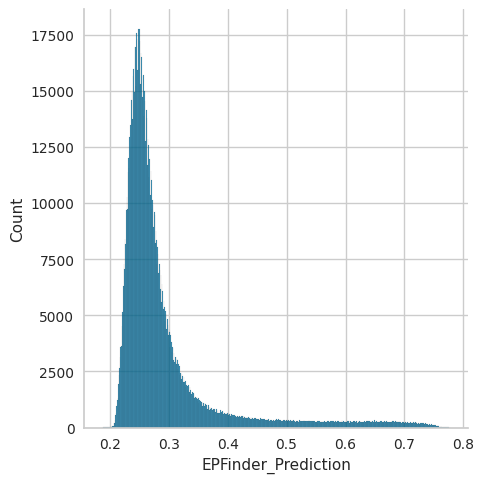

In [52]:
sns.displot(eBMD_open_index,x='EPFinder_Prediction')

In [53]:
eBMD_open_index

,SNPID_at_Enh,Prom_gene,Prom_TXID,EPFinder_Prediction
0,1:22545546:C:G,SAMD11,ENST00000420190.6,0.3027
1,1:22547352:T:C,SAMD11,ENST00000420190.6,0.3013
2,1:894573:G:A,SAMD11,ENST00000420190.6,0.5294
3,1:901559:G:A,SAMD11,ENST00000420190.6,0.6395
4,1:22531134:C:T,SAMD11,ENST00000437963.5,0.2459
...,...,...,...,...
1189944,23:131253361:T:C,CD40LG,ENST00000370629.6,0.3074
1189945,23:131253361:T:C,CD40LG,ENST00000370628.2,0.3232
1189946,23:131253361:T:C,F9,ENST00000479617.2,0.3220
1189947,23:131253361:T:C,F9,ENST00000394090.2,0.3208


In [54]:
eBMD_open_index.to_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/eBMD_OpenChromatin_OB_EPFinder_pred.tsv',index=False,sep='\t')

In [56]:
eBMD_anno_loci = pd.read_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/eBMD_OpenChromatin_OB_loci.txt',sep='\t')

In [57]:
eBMD_anno_loci

,#Chr,Start,End,Ref,Alt,Chr_hg19,POS_hg19,ID,FORMAT,GEFOS_Bmd,P,Region_Ensembl,GeneName_ID_Ensembl,GeneInfo_DistNG_Ensembl,ExonicFunc_Ensembl,AAChange_Ensembl,OpenChromatin_OB,SigHiC_OB,locus
0,1,959193,959193,G,A,1,894573,1:894573:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0898122:1:0.0216679:0.0032042:1.3E-11:1.4E-1...,1.300000e-11,intronic,NOC2L,NaN,NaN,NaN,ATAC-seq:chr1:958917-959837,RegulatoryBin:1:958000:960000;PromoterBin:1:94...,1
1,1,966179,966179,G,A,1,901559,1:901559:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.0883264:0.983145:0.0217067:0.00325624:2.3E-1...,2.300000e-11,upstream;downstream,PLEKHN1;KLHL17,dist=258;dist=460,NaN,NaN,DNase-seq:chr1:966095-966245;ATAC-seq:chr1:966...,RegulatoryBin:1:966000:968000;PromoterBin:1:97...,1
2,1,2961976,2961976,C,T,1,2878541,1:2878541:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.984413:1:0.0646058:0.00738839:3.5E-17:2.2E-1...,3.500000e-17,ncRNA_exonic,ENSG00000284745,NaN,NaN,NaN,DNase-seq:chr1:2961855-2962005,NaN,2
3,1,2963248,2963248,G,C,1,2879813,1:2879813:G:C,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.986493:0.949147:0.0829054:0.00813999:3.3E-21...,3.300000e-21,intronic,ENSG00000284745,NaN,NaN,NaN,DNase-seq:chr1:2963135-2963285,NaN,2
4,1,3067110,3067110,T,G,1,2983674,1:2983674:T:G,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.979832:0.967917:0.0712342:0.00663624:1.3E-23...,1.300000e-23,intronic,PRDM16-DT,NaN,NaN,NaN,DNase-seq:chr1:3067055-3067205,RegulatoryBin:1:3066000:3068000;PromoterBin:1:...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,22,50474312,50474312,G,A,22,50912741,22:50912741:G:A,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.820608:0.989342:0.0168967:0.00243717:3.2E-11...,3.200000e-11,intronic,SBF1,NaN,NaN,NaN,ATAC-seq:chr22:50473774-50475585,RegulatoryBin:22:50474000:50476000;PromoterBin...,510
9504,22,50474567,50474567,C,T,22,50912996,22:50912996:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.840761:0.985087:0.0167707:0.00256045:2.1E-10...,2.100000e-10,intronic,SBF1,NaN,NaN,NaN,ATAC-seq:chr22:50473774-50475585,RegulatoryBin:22:50474000:50476000;PromoterBin...,510
9505,22,50474753,50474753,C,T,22,50913182,22:50913182:C:T,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.876473:0.986615:0.0171333:0.00284451:4.8E-08...,4.800000e-08,intronic,SBF1,NaN,NaN,NaN,ATAC-seq:chr22:50473774-50475585,RegulatoryBin:22:50474000:50476000;PromoterBin...,510
9506,X,8948605,8948605,A,C,23,8916646,23:8916646:A:C,EAF:INFO:BETA:SE:P:P.I:P.NI:N,0.732694:1:-0.0216641:0.00211275:1.14429e-24:1...,1.144290e-24,intergenic,"LINC03114,NOLC1P1",dist=21452;dist=31820,NaN,NaN,DNase-seq:chrX:8948555-8948705,NaN,511


In [58]:
eBMD_open_index = eBMD_open_index.merge(
    eBMD_anno_loci[["ID", "locus"]],
    left_on="SNPID_at_Enh",
    right_on="ID",
    how="left"
)


In [59]:
eBMD_open_index

,SNPID_at_Enh,Prom_gene,Prom_TXID,EPFinder_Prediction,ID,locus
0,1:22545546:C:G,SAMD11,ENST00000420190.6,0.3027,1:22545546:C:G,8
1,1:22547352:T:C,SAMD11,ENST00000420190.6,0.3013,1:22547352:T:C,8
2,1:894573:G:A,SAMD11,ENST00000420190.6,0.5294,1:894573:G:A,1
3,1:901559:G:A,SAMD11,ENST00000420190.6,0.6395,1:901559:G:A,1
4,1:22531134:C:T,SAMD11,ENST00000437963.5,0.2459,1:22531134:C:T,8
...,...,...,...,...,...,...
1189944,23:131253361:T:C,CD40LG,ENST00000370629.6,0.3074,23:131253361:T:C,515
1189945,23:131253361:T:C,CD40LG,ENST00000370628.2,0.3232,23:131253361:T:C,515
1189946,23:131253361:T:C,F9,ENST00000479617.2,0.3220,23:131253361:T:C,515
1189947,23:131253361:T:C,F9,ENST00000394090.2,0.3208,23:131253361:T:C,515


In [60]:
eBMD_open_index.to_csv('/mnt/10T-backup-mingju/ifar/gwas/eBMD/eBMD_OpenChromatin_OB_EPFinder_pred.tsv',index=False,sep='\t')

# Enrichment analysis with the positive bone genes

In [62]:
from scipy.stats import chi2_contingency, fisher_exact
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("TWO-STEP STRATEGY: TOP-N FIRST → OPTIMIZE CUTOFF")
print("="*80)
print("\nStep 1: Select top N genes from each locus")
print("Step 2: Find optimal cutoff on top-N genes only")



TWO-STEP STRATEGY: TOP-N FIRST → OPTIMIZE CUTOFF

Step 1: Select top N genes from each locus
Step 2: Find optimal cutoff on top-N genes only


In [64]:
print("\n" + "="*80)
print("LOADING DATA")
print("="*80)

# Load EPFinder results
df = eBMD_open_index.copy()
print(f"✓ EPFinder data loaded: {df.shape[0]:,} E-P pairs")

# Load bone genes
with open('/home/mingju/EPFinder/dataset/eBMD/positive_gene_list.txt', 'r') as f:
    bone_genes = [line.strip() for line in f if line.strip()]
print(f"✓ Bone genes loaded: {len(bone_genes)} genes")



LOADING DATA
✓ EPFinder data loaded: 1,189,949 E-P pairs
✓ Bone genes loaded: 57 genes


In [65]:
# Constants
TOTAL_PROTEIN_CODING_GENES = 19455
TOTAL_POSITIVE_GENES = len(bone_genes)

print(f"\nConstants:")
print(f"  Total protein-coding genes: {TOTAL_PROTEIN_CODING_GENES:,}")
print(f"  Total positive (bone) genes: {TOTAL_POSITIVE_GENES}")

# Get unique loci
loci = sorted(df['locus'].unique())
print(f"\nNumber of GWAS loci: {len(loci)}")

# Check bone genes in data
bone_genes_set = set(bone_genes)
genes_in_data = set(df['Prom_gene'].unique())
bone_genes_in_data = bone_genes_set & genes_in_data

print(f"\nBone genes in data: {len(bone_genes_in_data)}/{len(bone_genes)}")

print("\n" + "="*80)
print("PREPARING LOCUS-BASED DATA")
print("="*80)

# For each locus, get max score per gene
print("\nCalculating max scores per gene per locus...")
locus_gene_scores = {}
for locus in tqdm(loci, desc="Processing loci"):
    df_locus = df[df['locus'] == locus]
    # Max score per gene in this locus
    gene_scores = df_locus.groupby('Prom_gene')['EPFinder_Prediction'].max()
    # Sort by score (descending)
    locus_gene_scores[locus] = gene_scores.sort_values(ascending=False)

print(f"✓ Prepared {len(locus_gene_scores)} loci")


Constants:
  Total protein-coding genes: 19,455
  Total positive (bone) genes: 57

Number of GWAS loci: 422

Bone genes in data: 54/57

PREPARING LOCUS-BASED DATA

Calculating max scores per gene per locus...


Processing loci: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 422/422 [00:00<00:00, 883.86it/s]

✓ Prepared 422 loci


In [66]:
def calculate_enrichment_stats(predicted_genes, positive_genes, 
                               total_protein_coding=19455):
    """Calculate enrichment statistics"""
    
    predicted_genes = set(predicted_genes)
    positive_genes = set(positive_genes)
    
    # Contingency table
    A = len(predicted_genes & positive_genes)
    B = len(predicted_genes - positive_genes)
    C = len(positive_genes - predicted_genes)
    D = total_protein_coding - A - B - C
    
    X = A + B
    Y = A
    
    if A < 0 or B < 0 or C < 0 or D < 0 or B == 0 or C == 0:
        return {
            'n_predicted': X, 'n_positive_in_predicted': Y,
            'precision': 0, 'recall': 0, 'enrichment': 0,
            'chi2': np.nan, 'p_value': 1.0,
            'odds_ratio': 0, 'or_ci_lower': 0, 'or_ci_upper': 0,
            'A': A, 'B': B, 'C': C, 'D': D, 'valid': False
        }
    
    table = [[A, B], [C, D]]
    
    try:
        chi2, p_value, dof, expected = chi2_contingency(table)
    except:
        chi2, p_value = np.nan, 1.0
    
    OR = (A * D) / (B * C)
    
    if A > 0:
        SE_log_OR = np.sqrt(1/A + 1/B + 1/C + 1/D)
        CI_lower = np.exp(np.log(OR) - 1.96 * SE_log_OR)
        CI_upper = np.exp(np.log(OR) + 1.96 * SE_log_OR)
    else:
        CI_lower = 0
        CI_upper = np.inf
    
    precision = A / X if X > 0 else 0
    recall = A / len(positive_genes) if len(positive_genes) > 0 else 0
    
    expected_prop = len(positive_genes) / total_protein_coding
    observed_prop = precision
    enrichment = observed_prop / expected_prop if expected_prop > 0 else 0
    
    return {
        'n_predicted': X, 'n_positive_in_predicted': Y,
        'precision': precision, 'recall': recall, 'enrichment': enrichment,
        'chi2': chi2, 'p_value': p_value,
        'odds_ratio': OR, 'or_ci_lower': CI_lower, 'or_ci_upper': CI_upper,
        'A': A, 'B': B, 'C': C, 'D': D, 'valid': True
    }

print("\n✓ Enrichment function defined")


✓ Enrichment function defined


In [67]:
print("\n" + "="*80)
print("STEP 1: TESTING DIFFERENT TOP-N VALUES")
print("="*80)

# Define top-N values to test
top_n_values = [1, 2, 3, 4, 5, 7, 10, 15, 20]
print(f"\nTop-N values to test: {top_n_values}")

# Store top-N subsets
topn_subsets = {}

print("\nCreating top-N subsets...")
for top_n in tqdm(top_n_values, desc="Creating subsets"):
    
    # Select top N from each locus
    topn_genes = []
    
    for locus, gene_scores in locus_gene_scores.items():
        # Get top N genes from this locus
        top_genes = gene_scores.head(top_n)
        
        for gene, score in top_genes.items():
            topn_genes.append({
                'locus': locus,
                'gene': gene,
                'score': score,
                'is_bone_gene': gene in bone_genes_in_data
            })
    
    # Convert to DataFrame
    df_topn = pd.DataFrame(topn_genes)
    topn_subsets[top_n] = df_topn
    
    print(f"  Top-{top_n}: {len(df_topn)} gene-locus pairs, "
          f"{df_topn['gene'].nunique()} unique genes, "
          f"{df_topn[df_topn['is_bone_gene']]['gene'].nunique()} bone genes")

print(f"\n✓ Created {len(topn_subsets)} top-N subsets")




STEP 1: TESTING DIFFERENT TOP-N VALUES

Top-N values to test: [1, 2, 3, 4, 5, 7, 10, 15, 20]

Creating top-N subsets...


Creating subsets:  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 5/9 [00:00<00:00, 30.79it/s]

  Top-1: 422 gene-locus pairs, 419 unique genes, 4 bone genes
  Top-2: 844 gene-locus pairs, 825 unique genes, 9 bone genes
  Top-3: 1266 gene-locus pairs, 1225 unique genes, 13 bone genes
  Top-4: 1688 gene-locus pairs, 1616 unique genes, 14 bone genes
  Top-5: 2110 gene-locus pairs, 1993 unique genes, 17 bone genes
  Top-7: 2954 gene-locus pairs, 2735 unique genes, 20 bone genes
  Top-10: 4211 gene-locus pairs, 3756 unique genes, 27 bone genes


Creating subsets: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.61it/s]

  Top-15: 6280 gene-locus pairs, 5251 unique genes, 33 bone genes
  Top-20: 8309 gene-locus pairs, 6568 unique genes, 38 bone genes

✓ Created 9 top-N subsets


In [70]:
print("\n" + "="*80)
print("STEP 2: OPTIMIZING CUTOFF FOR EACH TOP-N SUBSET")
print("="*80)

# For each top-N subset, find optimal cutoff
all_results = []

print("\nTesting cutoffs for each top-N subset...")
for top_n in tqdm(top_n_values, desc="Optimizing cutoffs"):
    
    df_topn = topn_subsets[top_n]
    
    # Get score range for this subset
    min_score = df_topn['score'].min()
    max_score = df_topn['score'].max()
    
    # Create cutoff range based on this subset's scores
    cutoff_range = np.linspace(min_score, max_score, 50)
    
    # Test each cutoff
    for cutoff in cutoff_range:
        
        # Apply cutoff to top-N subset
        genes_above_cutoff = df_topn[df_topn['score'] >= cutoff]['gene'].unique()
        
        # Skip if no genes
        if len(genes_above_cutoff) == 0:
            continue
        
        # Calculate enrichment
        stats = calculate_enrichment_stats(
            genes_above_cutoff,
            bone_genes_in_data,
            TOTAL_PROTEIN_CODING_GENES
        )
        
        # Add metadata
        stats['top_n'] = top_n
        stats['cutoff'] = cutoff
        stats['n_loci_contributing'] = df_topn[df_topn['score'] >= cutoff]['locus'].nunique()
        stats['pct_loci_contributing'] = (stats['n_loci_contributing'] / len(loci)) * 100
        
        all_results.append(stats)

# Convert to DataFrame
df_results = pd.DataFrame(all_results)

print(f"\n✓ Tested {len(df_results)} cutoff-topN combinations")



STEP 2: OPTIMIZING CUTOFF FOR EACH TOP-N SUBSET

Testing cutoffs for each top-N subset...


Optimizing cutoffs: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 20.74it/s]


✓ Tested 450 cutoff-topN combinations


In [71]:
print("\n" + "="*80)
print("STEP 2: OPTIMIZING CUTOFF FOR EACH TOP-N SUBSET")
print("="*80)

# For each top-N subset, find optimal cutoff
all_results = []

print("\nTesting cutoffs for each top-N subset...")
for top_n in tqdm(top_n_values, desc="Optimizing cutoffs"):
    
    enr_topn = topn_subsets[top_n]
    
    # Get score range for this subset
    min_score = enr_topn['score'].min()
    max_score = enr_topn['score'].max()
    
    # Create cutoff range based on this subset's scores
    cutoff_range = np.linspace(min_score, max_score, 50)
    
    # Test each cutoff
    for cutoff in cutoff_range:
        
        # Apply cutoff to top-N subset
        genes_above_cutoff = enr_topn[enr_topn['score'] >= cutoff]['gene'].unique()
        
        # Skip if no genes
        if len(genes_above_cutoff) == 0:
            continue
        
        # Calculate enrichment
        stats = calculate_enrichment_stats(
            genes_above_cutoff,
            bone_genes_in_data,
            TOTAL_PROTEIN_CODING_GENES
        )
        
        # Add metadata
        stats['top_n'] = top_n
        stats['cutoff'] = cutoff
        stats['n_loci_contributing'] = enr_topn[enr_topn['score'] >= cutoff]['locus'].nunique()
        stats['pct_loci_contributing'] = (stats['n_loci_contributing'] / len(loci)) * 100
        
        all_results.append(stats)

# Convert to DataFrame
enr_results = pd.DataFrame(all_results)

print(f"\n✓ Tested {len(enr_results)} cutoff-topN combinations")



STEP 2: OPTIMIZING CUTOFF FOR EACH TOP-N SUBSET

Testing cutoffs for each top-N subset...


Optimizing cutoffs: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 22.04it/s]


✓ Tested 450 cutoff-topN combinations


In [72]:
enr_results

,n_predicted,n_positive_in_predicted,precision,recall,enrichment,chi2,p_value,odds_ratio,or_ci_lower,or_ci_upper,A,B,C,D,valid,top_n,cutoff,n_loci_contributing,pct_loci_contributing
0,419,4,0.009547,0.074074,3.439406,4.812898,2.824750e-02,3.659952,1.315702,10.181061,4,415,50,18986,True,1,0.302700,422,100.000000
1,418,4,0.009569,0.074074,3.447634,4.835625,2.787753e-02,3.668986,1.318936,10.206302,4,414,50,18987,True,1,0.312398,421,99.763033
2,418,4,0.009569,0.074074,3.447634,4.835625,2.787753e-02,3.668986,1.318936,10.206302,4,414,50,18987,True,1,0.322096,421,99.763033
3,418,4,0.009569,0.074074,3.447634,4.835625,2.787753e-02,3.668986,1.318936,10.206302,4,414,50,18987,True,1,0.331794,421,99.763033
4,416,4,0.009615,0.074074,3.464209,4.881444,2.714691e-02,3.687184,1.325449,10.257153,4,412,50,18989,True,1,0.341492,419,99.289100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,568,12,0.021127,0.222222,7.611502,64.519189,9.559681e-16,9.683967,5.070255,18.495957,12,556,42,18845,True,20,0.732667,203,48.104265
446,360,8,0.022222,0.148148,8.006173,43.209914,4.917090e-11,9.411561,4.409514,20.087811,8,352,46,19049,True,20,0.743976,159,37.677725
447,152,5,0.032895,0.092593,11.851243,39.840417,2.755829e-10,13.365264,5.250305,34.022842,5,147,49,19254,True,20,0.755284,91,21.563981
448,32,2,0.062500,0.037037,22.517361,22.520299,2.079347e-06,24.834615,5.784669,106.619430,2,30,52,19371,True,20,0.766592,25,5.924171


In [73]:
enr_results_top1 = enr_results[enr_results['top_n'] == 1]

In [75]:
enr_results_top1.sort_values(by="odds_ratio", ascending=False)

,n_predicted,n_positive_in_predicted,precision,recall,enrichment,chi2,p_value,odds_ratio,or_ci_lower,or_ci_upper,A,B,C,D,valid,top_n,cutoff,n_loci_contributing,pct_loci_contributing
47,70,2,0.028571,0.037037,10.293651,8.830849,0.002962,10.934955,2.610924,45.797288,2,68,52,19333,True,1,0.758504,70,16.587678
46,132,2,0.015152,0.037037,5.458754,3.541272,0.059860,5.701479,1.374242,23.654403,2,130,52,19271,True,1,0.748806,132,31.279621
43,248,3,0.012097,0.055556,4.358199,4.842945,0.027759,4.599280,1.425734,14.836828,3,245,51,19156,True,1,0.719712,248,58.767773
45,176,2,0.011364,0.037037,4.094066,2.119338,0.145449,4.250000,1.027084,17.586197,2,174,52,19227,True,1,0.739108,176,41.706161
42,269,3,0.011152,0.055556,4.017968,4.186762,0.040741,4.231535,1.312430,13.643306,3,266,51,19135,True,1,0.710014,269,63.744076
28,368,4,0.010870,0.074074,3.916063,6.147397,0.013161,4.183956,1.503122,11.646083,4,364,50,19037,True,1,0.574243,370,87.677725
27,370,4,0.010811,0.074074,3.894895,6.087449,0.013615,4.160656,1.494794,11.580900,4,366,50,19035,True,1,0.564545,372,88.151659
26,374,4,0.010695,0.074074,3.853238,5.969641,0.014554,4.114811,1.478405,11.452659,4,370,50,19031,True,1,0.554847,376,89.099526
25,378,4,0.010582,0.074074,3.812463,5.854544,0.015537,4.069947,1.462365,11.327176,4,374,50,19027,True,1,0.545149,380,90.047393
41,281,3,0.010676,0.055556,3.846382,3.859553,0.049463,4.046339,1.255325,13.042727,3,278,51,19123,True,1,0.700316,282,66.824645
